### The Problem Statement:

Boom Bike is  bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

They want to understand the factors affecting the demand for Boom Bike( a  shared bikes  company) in the American market wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Business Goal:


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [23]:
#Read the data

bike=pd.read_csv("day.csv")

In [24]:
#Shape -- 730 rows 16 cols
bike.shape

(730, 16)

In [25]:
#first 5 rows

bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [26]:
# variables info - list of vars, data types missing info

bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [27]:
#summary of numeric columns

bike.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
instant,730.0,365.500000,210.877136,1.000000,183.250000,365.500000,547.750000,730.000000
season,730.0,2.498630,1.110184,1.000000,2.000000,3.000000,3.000000,4.000000
yr,730.0,0.500000,0.500343,0.000000,0.000000,0.500000,1.000000,1.000000
mnth,730.0,6.526027,3.450215,1.000000,4.000000,7.000000,10.000000,12.000000
holiday,730.0,0.028767,0.167266,0.000000,0.000000,0.000000,0.000000,1.000000
weekday,730.0,2.997260,2.006161,0.000000,1.000000,3.000000,5.000000,6.000000
workingday,730.0,0.683562,0.465405,0.000000,0.000000,1.000000,1.000000,1.000000
weathersit,730.0,1.394521,0.544807,1.000000,1.000000,1.000000,2.000000,3.000000
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
atemp,730.0,23.726322,8.150308,3.953480,16.889713,24.368225,30.445775,42.044800


In [28]:
#Check missing values -- no missing values
bike.isna().mean()

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [29]:
#Check for duplocate entry

bike_dup=bike #create a duplicate copy of the original dataset and check duplicate over there
bike_dup.drop_duplicates(subset=None , inplace=True)
bike_dup.shape # since both bike and bike_dup are having same rows hence no duplicates present.



(730, 16)

### Understanding Data dictionary and preparation of data
- mapping the categorical vars 

### Categorical variable Analysis

In [30]:
#Mapping the vars with more meaningful name as per data dicionary

#season:  1:Spring, 2:Summer, 3:Fall, 4:Winter

season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

bike["season"]=bike["season"].map(season_map)
bike["season"].value_counts(normalize=True) # frequence in % of total rows; uniformly distributed across the season

Fall      0.257534
Summer    0.252055
Spring    0.246575
Winter    0.243836
Name: season, dtype: float64

In [31]:
# mapping of month
mnth_map={ 1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

bike["mnth"]=bike["mnth"].map(mnth_map)
bike["mnth"].value_counts(normalize=True) #uniformly distributed across the month,though in Feb little bit dip but not too much

Jan    0.084932
Mar    0.084932
May    0.084932
Jul    0.084932
Aug    0.084932
Oct    0.084932
Dec    0.084932
Apr    0.082192
Jun    0.082192
Sep    0.082192
Nov    0.082192
Feb    0.076712
Name: mnth, dtype: float64

In [32]:
#weather situation

# 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


bike.weathersit.replace((1,2,3,4), ('Clear','Misty','Light_rainsnow','Heavy_rainsnow'), inplace=True)
bike.weathersit.value_counts(normalize=True) #

Clear             0.634247
Misty             0.336986
Light_rainsnow    0.028767
Name: weathersit, dtype: float64

In [33]:

#map week days

weekday_map={ 0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}

bike['weekday']=bike['weekday'].map(weekday_map)
bike['weekday'].value_counts(normalize=True) #uniformly distibuted


Sat    0.143836
Sun    0.143836
Mon    0.143836
Tue    0.142466
Thu    0.142466
Fri    0.142466
Wed    0.141096
Name: weekday, dtype: float64

In [34]:
bike['yr'].astype('category').value_counts()

0    365
1    365
Name: yr, dtype: int64

# Categorical Variable Analysis

Creating Box plot for the catgeorical variable to see  the spreadness of the categorical vars against the target var 'cnt'.
- outlier detection

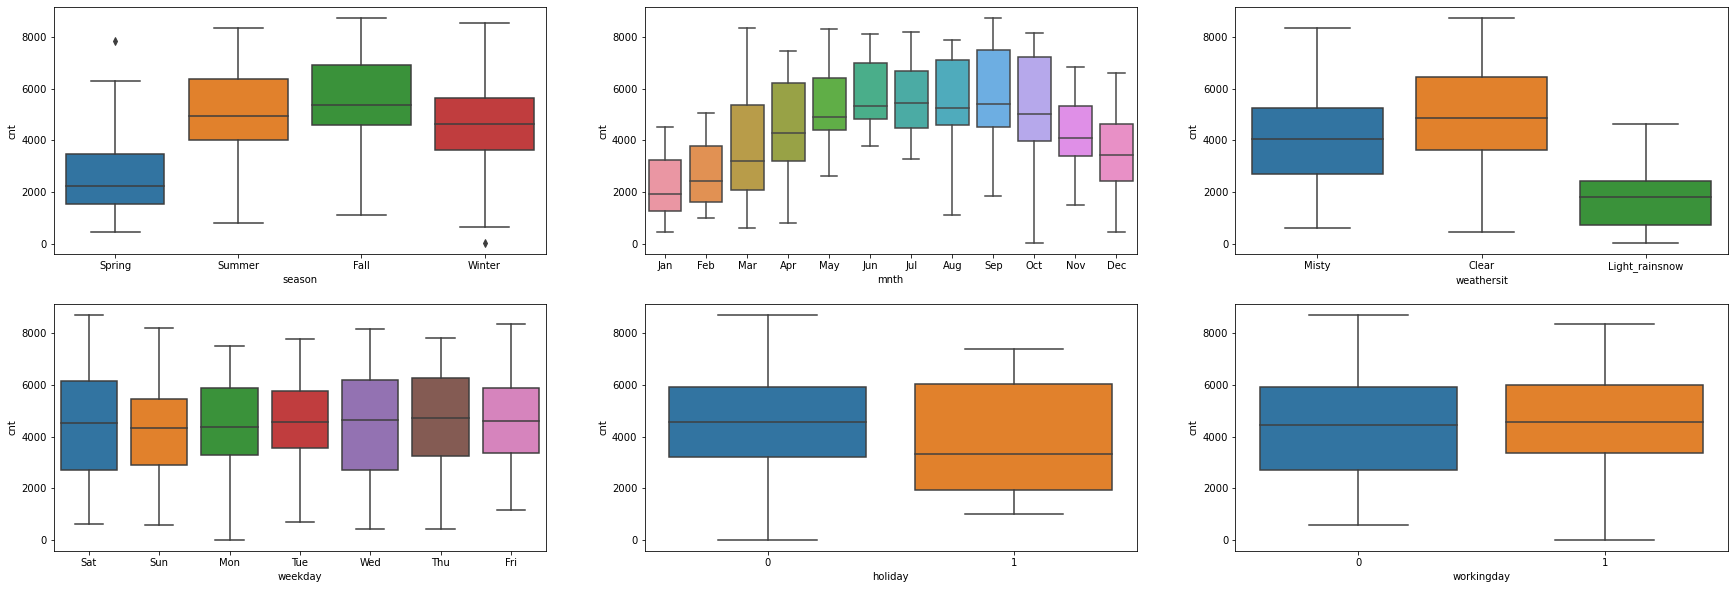

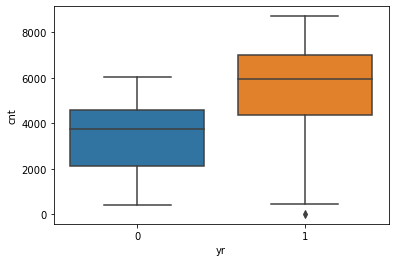

In [35]:
plt.figure( figsize=(30,10))

plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.show()
sns.boxplot(x='yr', y='cnt', data=bike)
plt.show()

# variations are clearly visible from the box plots for all the categorical vars

In [36]:
#Frequecny distribution of Categorical vriable

def cat_freq_stat(col):
    cat_col=bike.groupby(col)['cnt'].agg(['sum','mean','count']).sort_values('sum', ascending=False)
    cat_col['sum_percent']=cat_col['sum']/bike['cnt'].sum()*100
    cat_col['count_percent']=cat_col['count']/bike['cnt'].count()*100
    return round(cat_col,2)
    

In [37]:
cat_freq_stat(bike['season'])  # Fall is more than  double of Spring

,sum,mean,count,sum_percent,count_percent
season,,,,,
Fall,1061129,5644.30,188,32.24,25.75
Summer,918589,4992.33,184,27.91,25.21
Winter,841613,4728.16,178,25.57,24.38
Spring,469514,2608.41,180,14.27,24.66


In [38]:
cat_freq_stat(bike['mnth']) #May to Oct counts are higher

,sum,mean,count,sum_percent,count_percent
mnth,,,,,
Aug,351194,5664.42,62,10.67,8.49
Jun,346342,5772.37,60,10.52,8.22
Sep,345991,5766.52,60,10.51,8.22
Jul,344948,5563.68,62,10.48,8.49
May,331686,5349.77,62,10.08,8.49
Oct,322352,5199.23,62,9.80,8.49
Apr,269094,4484.90,60,8.18,8.22
Nov,254831,4247.18,60,7.74,8.22
Mar,228920,3692.26,62,6.96,8.49


In [39]:
cat_freq_stat(bike['weathersit']) #clear weather and misty are better and good weather for counts

,sum,mean,count,sum_percent,count_percent
weathersit,,,,,
Clear,2257952,4876.79,463,68.61,63.42
Misty,995024,4044.81,246,30.24,33.70
Light_rainsnow,37869,1803.29,21,1.15,2.88


In [40]:
cat_freq_stat(bike['weekday']) #almost uniformly distributed s

,sum,mean,count,sum_percent,count_percent
weekday,,,,,
Fri,487790,4690.29,104,14.82,14.25
Thu,485395,4667.26,104,14.75,14.25
Sat,477807,4550.54,105,14.52,14.38
Wed,471214,4574.89,103,14.32,14.11
Tue,469109,4510.66,104,14.25,14.25
Mon,455503,4338.12,105,13.84,14.38
Sun,444027,4228.83,105,13.49,14.38


In [41]:
cat_freq_stat(bike['workingday']) #working day the cnt is almost double than not working day

,sum,mean,count,sum_percent,count_percent
workingday,,,,,
1,2290576,4590.33,499,69.6,68.36
0,1000269,4330.17,231,30.4,31.64


In [42]:
cat_freq_stat(bike['holiday']) # non holidat has the most cnt

,sum,mean,count,sum_percent,count_percent
holiday,,,,,
0,3212410,4530.9,709,97.62,97.12
1,78435,3735.0,21,2.38,2.88


In [43]:
cat_freq_stat(bike['yr'])

,sum,mean,count,sum_percent,count_percent
yr,,,,,
1,2047742,5610.25,365,62.23,50.0
0,1243103,3405.76,365,37.77,50.0


### Data Visulisation
- Check the distribution of numerical variables


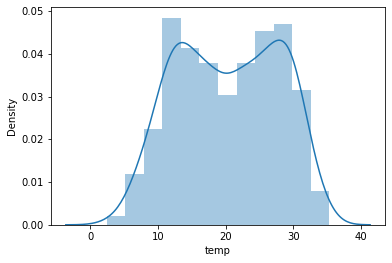

In [44]:
# check the distribution of numeric variable

# temperature
sns.distplot(bike['temp'])
plt.show()

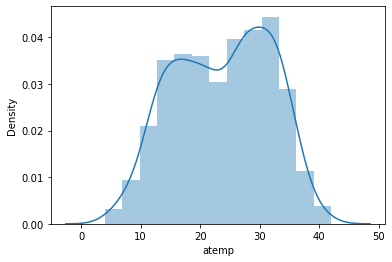

In [45]:
# feel like temperature atemp

sns.distplot(bike['atemp'])
plt.show()

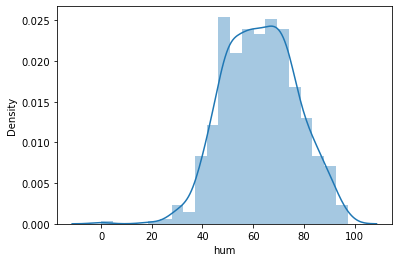

In [46]:
# humidity
sns.distplot(bike['hum'])
plt.show()

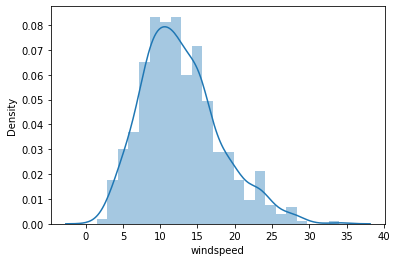

In [47]:
# wind speed
sns.distplot(bike['windspeed'])
plt.show()

In [48]:
#converting bike to float
bike['cnt'] = bike['cnt'].astype("float")

In [49]:
# Converting date to datetime format
bike['dteday']=bike['dteday'].astype('datetime64')

In [50]:
# convert the data type to float
bike['casual']=bike['casual'].astype("float")
bike["registered"]=bike["registered"].astype("float")

In [51]:
#drop instant and dteday as instant is unique categorical vars, mnth, yr are present on other vars
bike.drop(["instant","dteday"],axis=1, inplace=True)


In [52]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  casual      730 non-null    float64
 12  registered  730 non-null    float64
 13  cnt         730 non-null    float64
dtypes: float64(7), int64(3), object(4)
memory usage: 85.5+ KB


In [53]:
# All categorical variables in the dataset
categorical_var=bike.select_dtypes(exclude=['float64','datetime64',"int64"])
print(categorical_var.columns)

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')


In [54]:
# All numeric variables in the dataset
numeric_var= bike.select_dtypes(include=['float64'])
numeric_var.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


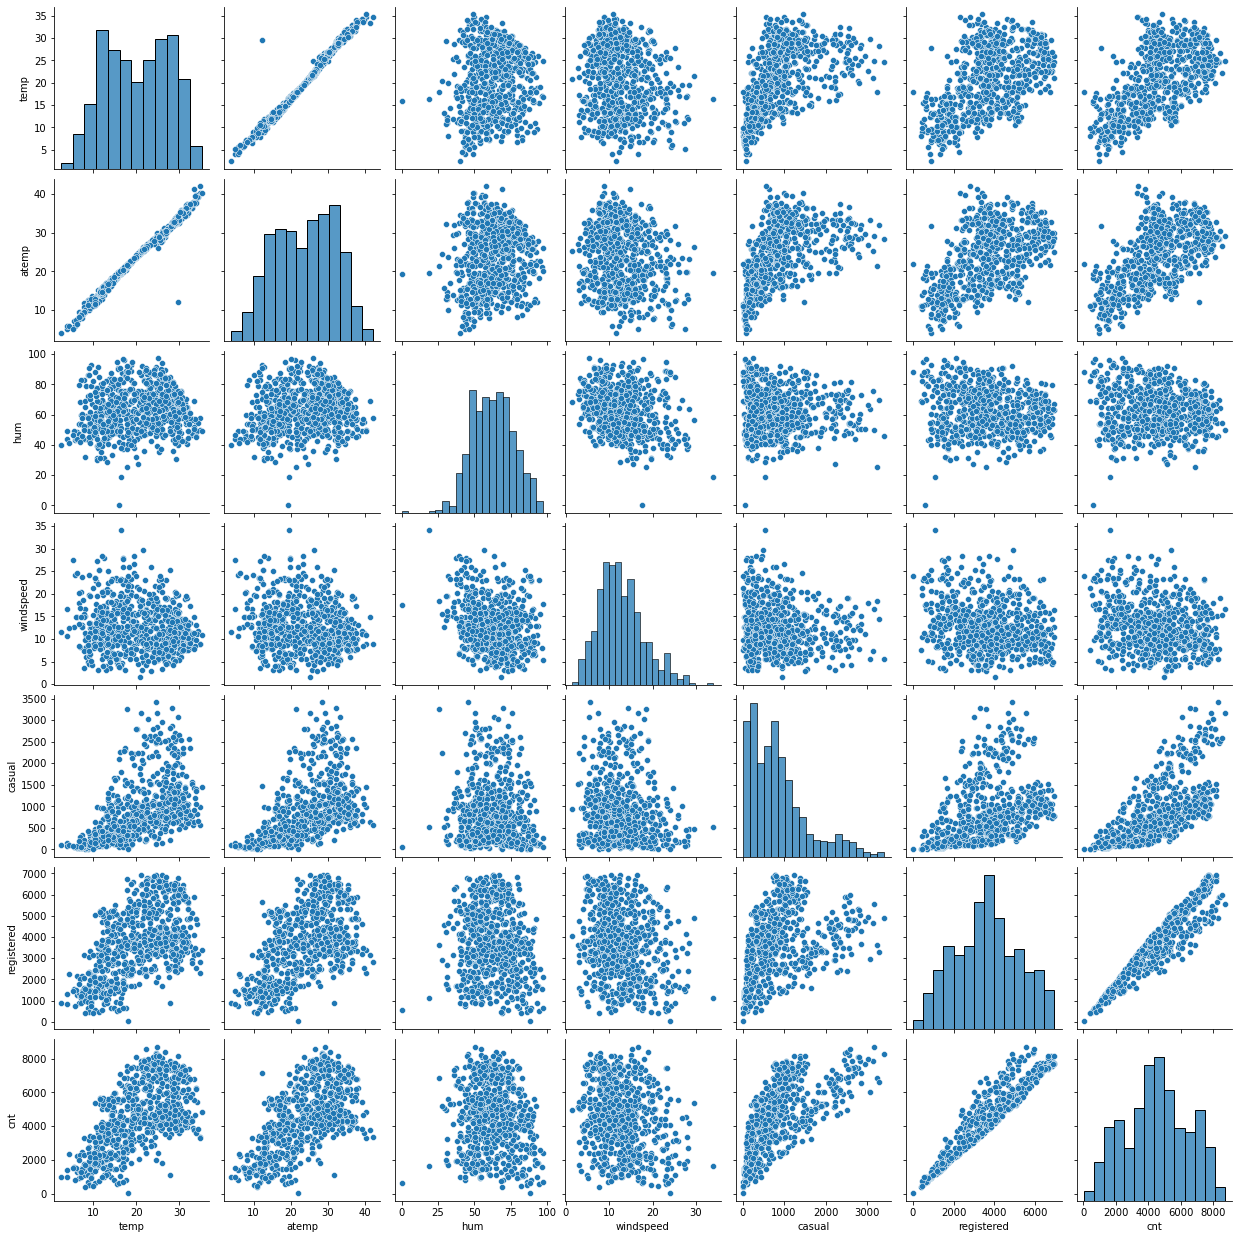

In [56]:
# Pairwise scatter plot to check the distribution
sns.pairplot(numeric_var)
plt.show()

- The correlations are very high between temp and atemp,cnt and registered ,cnt and casual
- atemp can be dropped.
- cnt is the summation of casual and registered hence these vars also can be dropped

In [57]:
corr=numeric_var.corr()
corr   

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


--atemp has highest correlation with temp- need to drop atemp to avoid multicolinearity

<AxesSubplot:>

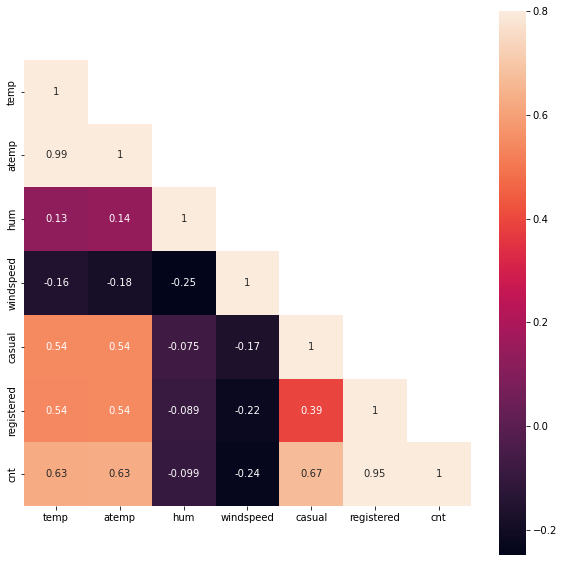

In [58]:
#visualisation of correlation matrix in heatmap
# heatmap
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(corr, mask=mask,vmax=.8, square=True,annot=True)


- Correlation between atemp and temp is .99 means both the vars are same , we can keep only one:  temp

In [59]:
#dropping of vars atemp, registered,casual
bike.drop(["atemp","casual","registered"], axis=1, inplace=True)
bike.shape

(730, 11)

In [60]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

## Data Preparation

- create dummy variables 
- The variable season,mnth,weekday and weathersit have different levels. We need to convert these levels into integers.

In [61]:
# Subset all categorical variables
categorical_var=bike.select_dtypes(include=['object'])
categorical_var


,season,mnth,weekday,weathersit
0,Spring,Jan,Sat,Misty
1,Spring,Jan,Sun,Misty
2,Spring,Jan,Mon,Clear
3,Spring,Jan,Tue,Clear
4,Spring,Jan,Wed,Clear
...,...,...,...,...
725,Spring,Dec,Thu,Misty
726,Spring,Dec,Fri,Misty
727,Spring,Dec,Sat,Misty
728,Spring,Dec,Sun,Clear


In [62]:
#creating dummy vars season:
season_dummy=pd.get_dummies(bike['season'], drop_first=True)
season_dummy.value_counts()

Spring  Summer  Winter
0       0       0         188
        1       0         184
1       0       0         180
0       0       1         178
dtype: int64

In [63]:
# creating dummy vars for mnth:

mnth_dummy=pd.get_dummies( bike['mnth'], drop_first=True)
mnth_dummy.value_counts()


Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sep
0    0    0    0    0    0    0    0    0    1    0      62
                                   1    0    0    0      62
                              1    0    0    0    0      62
                    1    0    0    0    0    0    0      62
               1    0    0    0    0    0    0    0      62
     1    0    0    0    0    0    0    0    0    0      62
1    0    0    0    0    0    0    0    0    0    0      62
0    0    0    0    0    0    0    0    0    0    0      60
                                                  1      60
                                        1    0    0      60
                         1    0    0    0    0    0      60
          1    0    0    0    0    0    0    0    0      56
dtype: int64

In [64]:
# creating dummy vars for mnth:

weekday_dummy=pd.get_dummies( bike['weekday'], drop_first=True)
weekday_dummy.value_counts()


Mon  Sat  Sun  Thu  Tue  Wed
0    0    1    0    0    0      105
     1    0    0    0    0      105
1    0    0    0    0    0      105
0    0    0    0    0    0      104
                    1    0      104
               1    0    0      104
               0    0    1      103
dtype: int64

In [65]:
# creating dummy vars for mnth:

weathersit_dummy=pd.get_dummies( bike['weathersit'], drop_first=True)
weathersit_dummy.value_counts()


Light_rainsnow  Misty
0               0        463
                1        246
1               0         21
dtype: int64

In [66]:
# create dummy variables all vars together

df_dummies=pd.get_dummies(categorical_var, drop_first=True)
df_dummies.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [67]:
categorical_var.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [68]:
#drop all categorical vars which are used to create dummy vars

bike.drop(list(categorical_var.columns), axis=1, inplace=True)
bike.shape

(730, 7)

In [69]:
# Concatenate dummy variables with the original dataframe -- total columns have increased due to dummy vars
bike = pd.concat([bike, df_dummies], axis=1)
bike.shape

(730, 29)

In [70]:
bike.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985.0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801.0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349.0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562.0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600.0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


### Model Building and Evaluation

- Split the data into train and test sets :  train set is used to train the model and test set is to validate the model

In [71]:
# Split the dataframe into train and test sets

np.random.seed(0)
bike_train, bike_test = train_test_split(bike, train_size=0.7, test_size=0.3, random_state=100)

In [72]:
print(bike_train.shape)
print(bike_test.shape)

(510, 29)
(219, 29)


### Scaling
- Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.




In [73]:
#All variable are comparable scale -- ineterpretability
#Rescaling help in convergence in faster

#Min max sacling ( normalisation ): between 0 and 1
#Standardization(meam=0 sigma =1)
# (x-mu)/sigma
# x
# normalisation: (x-xmin)/(xmax - xmin) ..... it solve the outlier problem as the max data are lies on 1 

In [74]:
scaler=MinMaxScaler()

In [75]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
var = ['temp', 'hum', 'windspeed','cnt']

bike_train[var] = scaler.fit_transform(bike_train[var])
bike_train.head()


,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [77]:
bike_train.describe().transpose() #min =0 max =1 for all vars

,count,mean,std,min,25%,50%,75%,max
yr,510.0,0.507843,0.500429,0.0,0.000000,1.000000,1.000000,1.0
holiday,510.0,0.025490,0.157763,0.0,0.000000,0.000000,0.000000,1.0
workingday,510.0,0.676471,0.468282,0.0,0.000000,1.000000,1.000000,1.0
temp,510.0,0.537262,0.225844,0.0,0.339853,0.540519,0.735215,1.0
hum,510.0,0.650369,0.145882,0.0,0.538643,0.653714,0.754830,1.0
windspeed,510.0,0.320768,0.169797,0.0,0.199179,0.296763,0.414447,1.0
cnt,510.0,0.513620,0.224593,0.0,0.356420,0.518638,0.684710,1.0
season_Spring,510.0,0.243137,0.429398,0.0,0.000000,0.000000,0.000000,1.0
season_Summer,510.0,0.245098,0.430568,0.0,0.000000,0.000000,0.000000,1.0
season_Winter,510.0,0.249020,0.432870,0.0,0.000000,0.000000,0.000000,1.0


##  Step 3: Training the Model

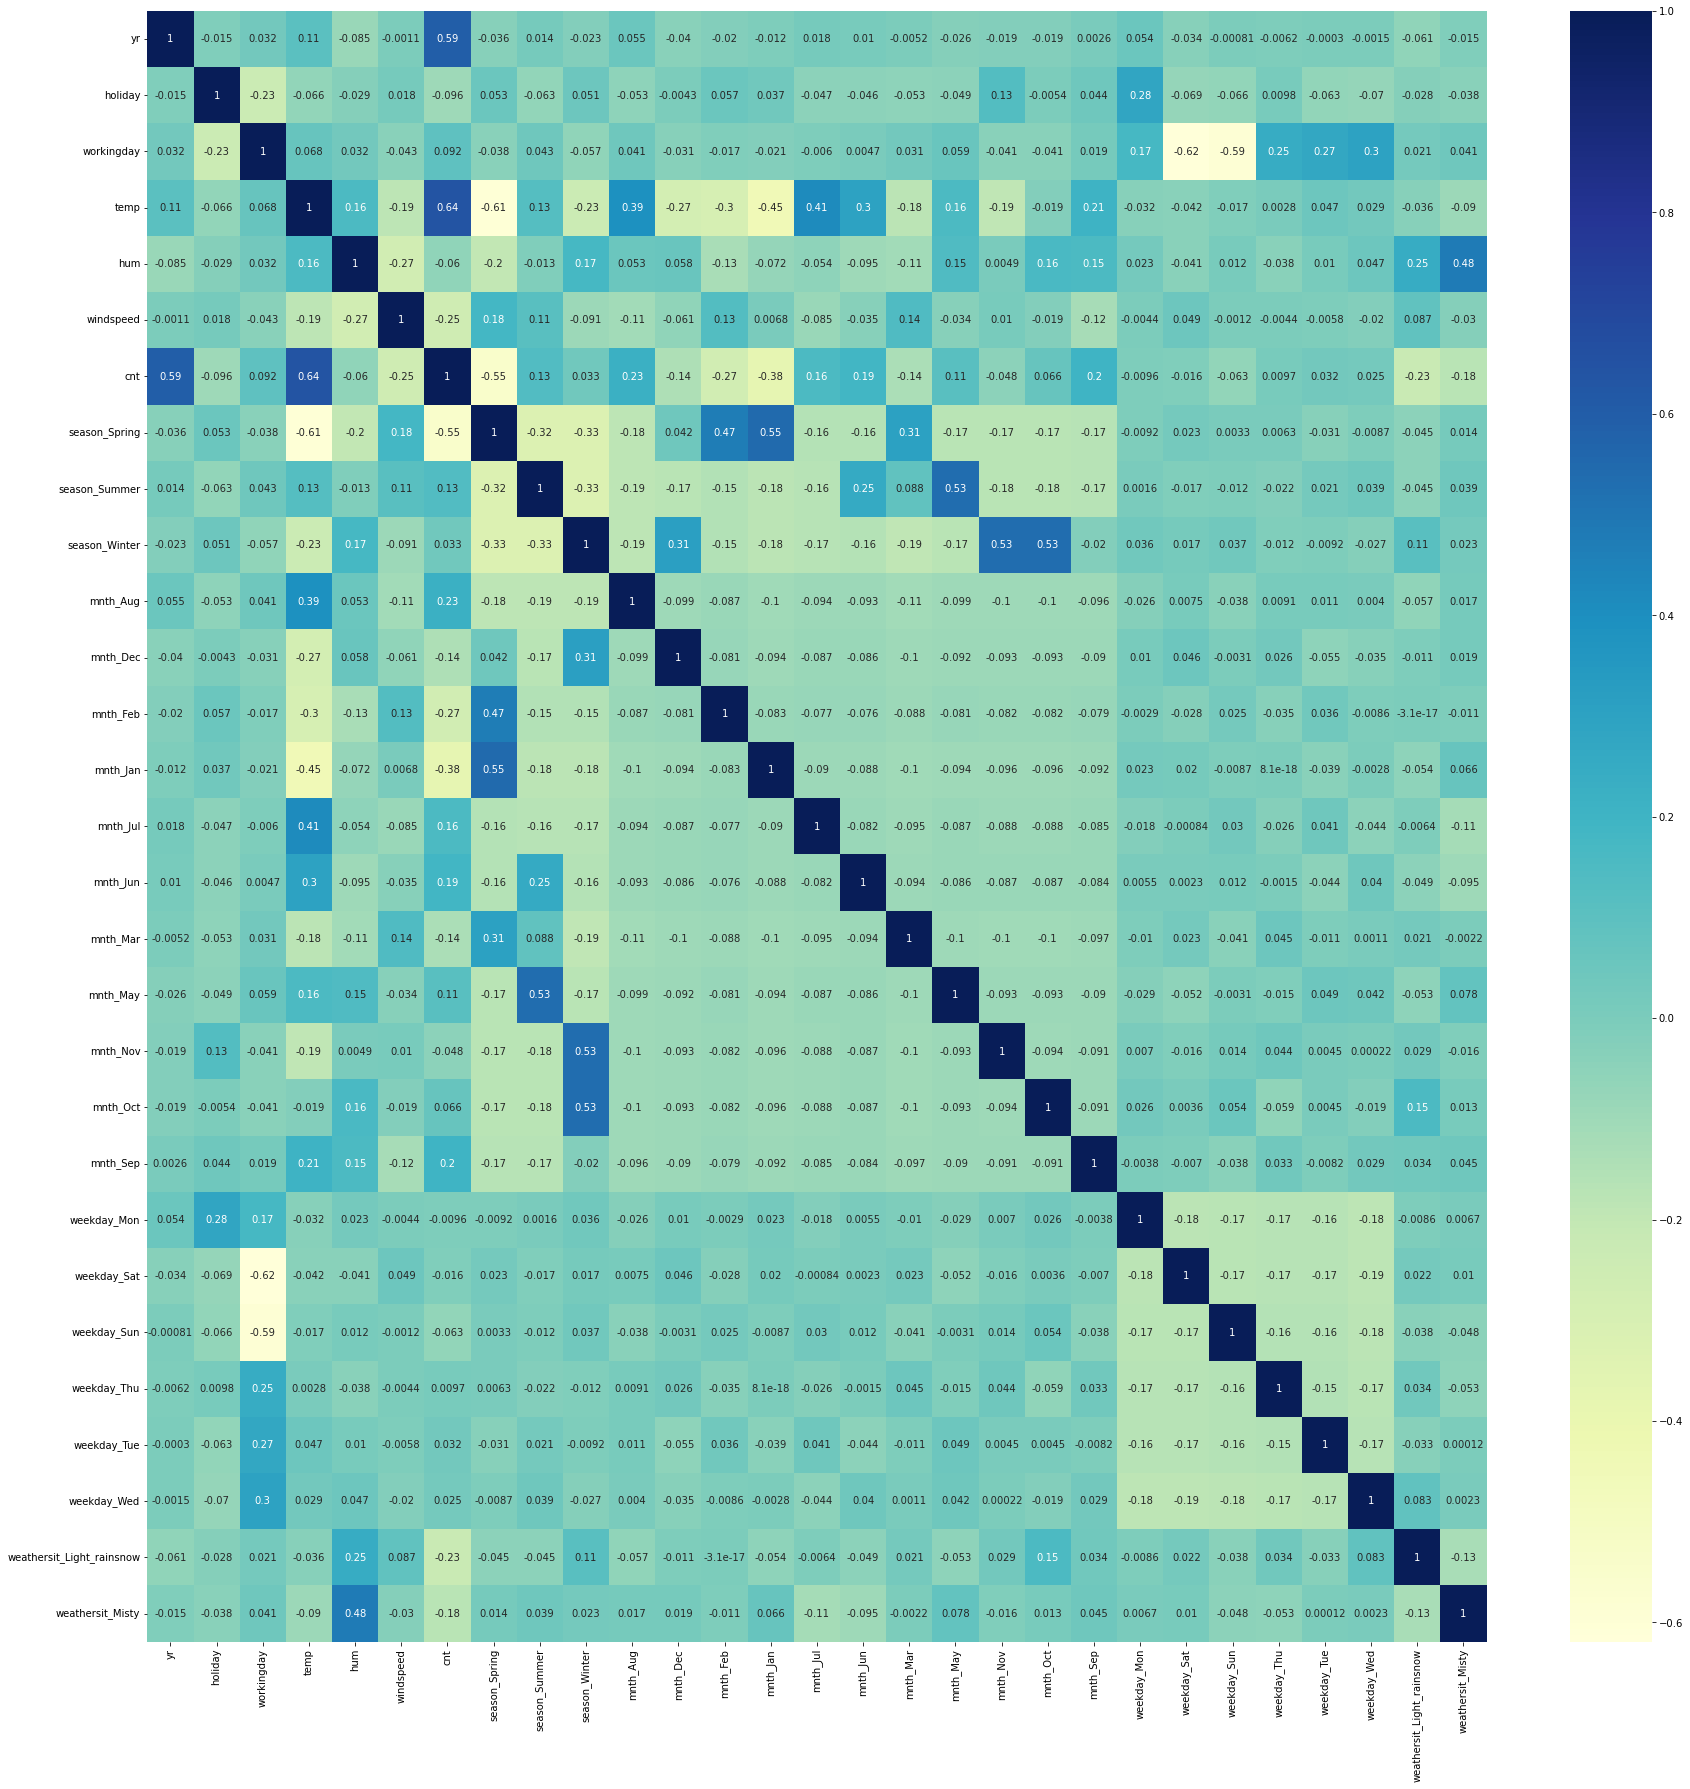

In [76]:
plt.figure( figsize=(30,30))
sns.heatmap( bike_train.corr(), annot=True,   cmap='YlGnBu')
plt.show()

In [77]:
# X_train , y_train 

y_train= bike_train.pop('cnt') # popping out the cnt column i.e. target column to y_train
X_train=bike_train  # other than targe  column, all columns are present in X_train


In [78]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

In [79]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_Spring,season_Summer,season_Winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


### Building First Model with All the features

In [80]:
X_train_ml= sm.add_constant(X_train) # statsmodel does not consider intercept on its own so intercept is added as constant

lr = sm.OLS(y_train, X_train_ml).fit() # fit the model

#parameter list and coefficient
lr.params

const                        0.245085
yr                           0.232116
holiday                      0.009959
workingday                   0.096884
temp                         0.450562
hum                         -0.151340
windspeed                   -0.186453
season_Spring               -0.048159
season_Summer                0.038725
season_Winter                0.105847
mnth_Aug                     0.014404
mnth_Dec                    -0.045586
mnth_Feb                    -0.032282
mnth_Jan                    -0.062777
mnth_Jul                    -0.040350
mnth_Jun                    -0.002972
mnth_Mar                     0.001045
mnth_May                     0.023940
mnth_Nov                    -0.041851
mnth_Oct                     0.007534
mnth_Sep                     0.081060
weekday_Mon                 -0.020907
weekday_Sat                  0.096389
weekday_Sun                  0.041853
weekday_Thu                 -0.009237
weekday_Tue                 -0.018890
weekday_Wed 

In [81]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)


LinearRegression()

In [82]:
# Print the coefficients and intercept
print(lm.coef_)
print(lm.intercept_)

[ 0.23211572 -0.0513123   0.03561284  0.45056169 -0.15134004 -0.18645332
 -0.04815901  0.03872462  0.10584692  0.01440398 -0.0455859  -0.03228181
 -0.06277659 -0.04035007 -0.00297239  0.00104515  0.02393995 -0.04185131
  0.00753359  0.0810599  -0.02090673  0.03511753 -0.01941807 -0.00923674
 -0.01888985 -0.00538751 -0.25744279 -0.0610664 ]
0.30635563045663317


In [83]:
# getting the model summary
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          8.74e-182
Time:                        12:21:04   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2451      0.035      6.955      0.000       0.176       0.314
yr                            0.2321      0.008     28.820      0.000       0.216       0.248
holiday                       0.0100      0.024      0.415      0.678      -0.037       0.057
workingday                    0.0969      0.012      7.905      0.000       0.073       0.121
temp                          0.4506      0.046      9.734      0.000       0.360       0.542
hum                          -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed                    -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_Spring                -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_Summer                 0.0387      0.026      1.478      0.140      -0.013       0.090
season_Winter                 0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug                      0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec                     -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb                     -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan                     -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul                     -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun                     -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar                      0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May                      0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov                     -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct                      0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep                      0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon                  -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat                   0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun                   0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thu                  -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue                  -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed                  -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_Light_rainsnow    -0.2574      0.026     -9.778      0.000      -0.309      -0.206
weathersit_Misty             -0.0611      0.010     -5.854      0.000      -0.082      -0.041
===========================================================================

coef	std err	p - value	p value > alpha
holiday	0.01	0.678	Yes
season_Spring	-0.0482	0.109	Yes
season_Summer	0.0387	0.14	Yes
mnth_Aug	0.0144	0.669	Yes
mnth_Dec	-0.0456	0.175	Yes
mnth_Feb	-0.0323	0.327	Yes
mnth_Jan	-0.0628	0.062	Yes
mnth_Jul	-0.0404	0.25	Yes
mnth_Jun	-0.003	0.906	Yes
mnth_Mar	0.001	0.966	Yes
mnth_May	0.0239	0.255	Yes
mnth_Nov	-0.0419	0.25	Yes
mnth_Oct	0.0075	0.833	Yes
weekday_Mon	-0.0209	0.173	Yes
weekday_Thu	-0.0092	0.552	Yes
weekday_Tue	-0.0189	0.223	Yes
weekday_Wed	-0.0054	0.718	Yes

all the above vars are insignificant


### Though the overall model is significant R^2 = .853, F Statistics is also high and the overall p value of F stats is significant.. but the model is not relibale as the individual parameters are not highly significant as p>.05 for  many vars.. 
- moreover we can not keep all the variable as it will increase model complexity too.

### Model Builing use RFE 
- It is obviously not recommended to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the `statsmodels` library to build models using the shortlisted features (this is also because `SKLearn` doesn't have `Adjusted R-squared` that `statsmodels` has).

In [87]:


# RFE with 15 features
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [88]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 15 features
lm = LinearRegression()
rfe = RFE(lm, n_features_to_select =15)

# Fit with 15 features
rfe.fit(X_train, y_train)

# parameter which have been selected in the list of 15

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 10),
 ('mnth_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 12),
 ('weathersit_Light_rainsnow', True, 1),
 ('weathersit_Misty', True, 1)]

In [89]:
# create a col of these vars:

col= X_train.columns[ rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sep', 'weekday_Sat', 'weathersit_Light_rainsnow',
       'weathersit_Misty'],
      dtype='object')

In [90]:
# columns which are not selected using rfe

X_train.columns[ ~ rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [91]:
# Creating a subset of data containg the columns selected by RFE

X_train_rfe=X_train[col]

In [93]:
# Import statsmodels
import statsmodels.api as sm  

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model with 15 variables
rfe5 = sm.OLS(y_train, X_train_rfe).fit()   
print(rfe5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.31e-191
Time:                        12:22:12   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Manual Model Building and Evaluation

In [94]:
# Import statsmodels
import statsmodels.api as sm  

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model with 15 variables
lm1 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          2.31e-191
Time:                        12:22:25   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Note: 
- R^ 2 .849, adjusted R^2 .844, F stats-- overall model fit stats and corresponding p value 2.31e-191 are significant.
- AIC and BIC are also low  
- All vars are significant at .05 significant level.

In [95]:
# Check for the VIF values of the feature variables to avoid multi colinerity
from statsmodels.stats.outliers_influence import variance_inflation_factor



In [96]:
# to check VIF constant means intercept is not required

a=X_train_rfe.drop('const',axis=1)

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = a.columns
vif['VIF'] = [variance_inflation_factor(a.values, i) for i in range(a.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
4,hum,29.40
3,temp,17.77
2,workingday,5.31
5,windspeed,4.73
6,season_Spring,4.53
8,season_Winter,3.48
7,season_Summer,2.84
14,weathersit_Misty,2.29
0,yr,2.09
12,weekday_Sat,1.98


### hum has highest  VIF  so we can first drop it 

In [98]:
X_train_rfe.drop("hum", axis=1, inplace=True)


In [99]:
b=X_train_rfe.drop('const',axis=1)

In [102]:
#calculate VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = b.columns
vif['VIF'] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.67
5,season_Spring,3.08
6,season_Summer,2.33
0,yr,2.08
7,season_Winter,1.99
11,weekday_Sat,1.97
8,mnth_Jan,1.62
9,mnth_Jul,1.59


In [103]:

# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model 
lm2 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          7.33e-189
Time:                        12:23:22   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Note:
- since overall model Fitted well as F Stats is higher, p value of overall model is also signifucant.
- R ^ 2 , adjusted R^2 and AIC and BIC are lower
- though the indivudal parameters p value under significant range so we can still tweak the model.
- since p values are almost good so elimination will be based on VIF

In [104]:
X_train_rfe.head()

,const,yr,holiday,workingday,temp,windspeed,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Jul,mnth_Sep,weekday_Sat,weathersit_Light_rainsnow,weathersit_Misty
653,1.0,1,0,1,0.509887,0.300794,0,0,1,0,0,0,0,0,0
576,1.0,1,0,1,0.815169,0.264686,0,0,0,0,1,0,0,0,0
426,1.0,1,0,0,0.442393,0.255342,1,0,0,0,0,0,1,0,1
728,1.0,1,0,0,0.245101,0.663106,1,0,0,0,0,0,0,0,0
482,1.0,1,0,0,0.395666,0.188475,0,1,0,0,0,0,1,0,1


In [105]:
#drop the var in next step:
X_train_rfe.drop("temp", axis=1, inplace=True)
# drop const  and assign df
c=X_train_rfe.drop('const',axis=1)


#calculate VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = c.columns
vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
4,season_Spring,2.97
5,season_Summer,2.27
6,season_Winter,1.99
0,yr,1.91
10,weekday_Sat,1.69
7,mnth_Jan,1.60
12,weathersit_Misty,1.56
8,mnth_Jul,1.30


In [115]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model 
lm3 = sm.OLS(y_train, X_train_rfe).fit()   
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     136.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          4.04e-154
Time:                        12:24:05   Log-Likelihood:                 425.72
No. Observations:                 510   AIC:                            -823.4
Df Residuals:                     496   BIC:                            -764.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Note
- p values for the var  jul become insignificant .645, holiday .07
- drop mnth_jul as it has high p value

# We could have :
- high p value high vif
-high p, low vif :  remove these first
- low p , high vif : remove these after the ones above
-low p low vif remove 

In [105]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'workingday', 'windspeed', 'season_Spring',
       'season_Summer', 'season_Winter', 'mnth_Jan', 'mnth_Jul', 'mnth_Sep',
       'weekday_Sat', 'weathersit_Light_rainsnow', 'weathersit_Misty'],
      dtype='object')

In [116]:
#remove mnth_jul

X_train_rfe.drop('mnth_Jul', axis=1, inplace=True)
# drop const  and assign df
d=X_train_rfe.drop('const',axis=1)


#calculate VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = d.columns
vif['VIF'] = [variance_inflation_factor(d.values, i) for i in range(d.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif



,Features,VIF
3,windspeed,4.12
2,workingday,3.54
4,season_Spring,2.68
5,season_Summer,2.00
0,yr,1.89
6,season_Winter,1.78
9,weekday_Sat,1.62
7,mnth_Jan,1.60
11,weathersit_Misty,1.56
8,mnth_Sep,1.20


In [117]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model 
lm4 = sm.OLS(y_train, X_train_rfe).fit()   

#Summary of the model and parameters
print(lm4.summary())


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     147.6
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          3.62e-155
Time:                        12:25:00   Log-Likelihood:                 425.61
No. Observations:                 510   AIC:                            -825.2
Df Residuals:                     497   BIC:                            -770.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

-Though R ^ 2 has reduced a bit but still its good model
- drop holiday var as p >.05

In [118]:

#drop the var in next step:
X_train_rfe.drop("holiday", axis=1, inplace=True)
# drop const  and assign df
e=X_train_rfe.drop('const',axis=1)


#calculate VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = e.columns
vif['VIF'] = [variance_inflation_factor(e.values, i) for i in range(e.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
3,season_Spring,2.65
4,season_Summer,1.99
0,yr,1.88
5,season_Winter,1.73
6,mnth_Jan,1.60
8,weekday_Sat,1.56
10,weathersit_Misty,1.56
7,mnth_Sep,1.18


In [119]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model 
lm5 = sm.OLS(y_train, X_train_rfe).fit()   

#Summary of model and parameters 
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     160.0
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          1.30e-155
Time:                        12:25:16   Log-Likelihood:                 424.03
No. Observations:                 510   AIC:                            -824.1
Df Residuals:                     498   BIC:                            -773.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

- All the p values are significant and adjusted r^2 also marginally reduced

In [120]:
# check VIF


#drop the var in next step:
X_train_rfe.drop("windspeed", axis=1, inplace=True)
# drop const  and assign df
f=X_train_rfe.drop('const',axis=1)


#calculate VIF
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs except for the constant

vif = pd.DataFrame()
vif['Features'] = f.columns
vif['VIF'] = [variance_inflation_factor(f.values, i) for i in range(f.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,2.89
2,season_Spring,2.17
0,yr,1.83
3,season_Summer,1.70
4,season_Winter,1.59
5,mnth_Jan,1.58
9,weathersit_Misty,1.56
7,weekday_Sat,1.44
6,mnth_Sep,1.17
8,weathersit_Light_rainsnow,1.07


In [121]:
# Add a constant to the model
X_train_rfe = sm.add_constant(X_train_rfe)
# Fitting the model 
lm5 = sm.OLS(y_train, X_train_rfe).fit()   
#Summary of the model and parameters
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     158.9
Date:                Wed, 17 Aug 2022   Prob (F-statistic):          4.34e-148
Time:                        12:25:53   Log-Likelihood:                 403.55
No. Observations:                 510   AIC:                            -785.1
Df Residuals:                     499   BIC:                            -738.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [122]:
X_train_rfe_test=X_train_rfe
X_train_rfe_test

,const,yr,workingday,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Sep,weekday_Sat,weathersit_Light_rainsnow,weathersit_Misty
653,1.0,1,1,0,0,1,0,0,0,0,0
576,1.0,1,1,0,0,0,0,0,0,0,0
426,1.0,1,0,1,0,0,0,0,1,0,1
728,1.0,1,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0,1,0,0,0,0,0,1
578,1.0,1,1,0,0,0,0,0,0,0,0
53,1.0,0,1,1,0,0,0,0,0,0,0
350,1.0,0,0,0,0,1,0,0,1,0,1


All the VIF values and p-values seem to be in the permissible range now. Also the `Adjusted R-squared` value has dropped from `84.5%` with **28 variables** to just `75.6%` using **10 variables**. This model is explaining most of the variance without being too complex. So let's proceed with this model.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

In [143]:
#y_train_predcited
y_train_predicted = lm5.predict(X_train_rfe_test)

Text(0.5, 0, 'Errors')

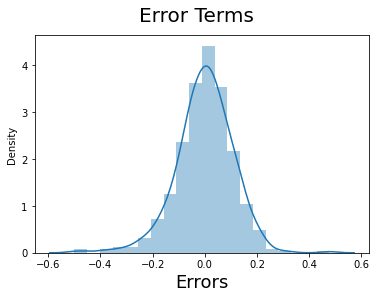

In [144]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_predicted), bins = 20)
# Plot heading
fig.suptitle('Error Terms', fontsize = 20)    
# Give the X-label
plt.xlabel('Errors', fontsize = 18)       

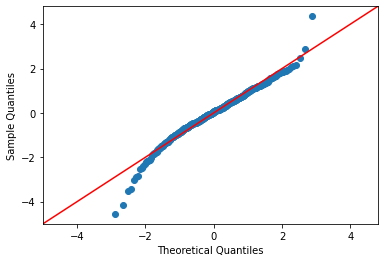

In [145]:
# Error terms are nomally distributed using quantile quantile plot

sm.qqplot((y_train - y_train_predicted), fit=True, line='45')
plt.show()

### Errors are normally distributed - normality assumption is met

### Making Preiction

In [126]:
X_train_rfe

,const,yr,workingday,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Sep,weekday_Sat,weathersit_Light_rainsnow,weathersit_Misty
653,1.0,1,1,0,0,1,0,0,0,0,0
576,1.0,1,1,0,0,0,0,0,0,0,0
426,1.0,1,0,1,0,0,0,0,1,0,1
728,1.0,1,0,1,0,0,0,0,0,0,0
482,1.0,1,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,1,0,1,0,0,0,0,0,1
578,1.0,1,1,0,0,0,0,0,0,0,0
53,1.0,0,1,1,0,0,0,0,0,0,0
350,1.0,0,0,0,0,1,0,0,1,0,1


In [127]:
var #list of numeric vars

['temp', 'hum', 'windspeed', 'cnt']

In [128]:
# Apply scaler() to the numeric colms of the test data
var = ['temp', 'hum', 'windspeed','cnt']

bike_test[var] = scaler.transform(bike_test[var])
bike_test.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light_rainsnow,weathersit_Misty
184,0,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [132]:
#split the data into X_test, y_test after scaling

col2=f.columns # the final vars of the selected model

y_test=bike_test.pop('cnt')
X_test=bike_test
X_test_rfe=X_test[col2]
X_test_rfe.head()

,yr,workingday,season_Spring,season_Summer,season_Winter,mnth_Jan,mnth_Sep,weekday_Sat,weathersit_Light_rainsnow,weathersit_Misty
184,0,0,0,0,0,0,0,0,0,1
535,1,1,0,1,0,0,0,0,0,0
299,0,1,0,0,1,0,0,0,0,1
221,0,1,0,0,0,0,0,0,0,0
152,0,1,0,1,0,0,0,0,0,0


In [133]:
# Add a constant to the test set created
X_test_rfe = sm.add_constant(X_test_rfe)
X_test_rfe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   const                      219 non-null    float64
 1   yr                         219 non-null    int64  
 2   workingday                 219 non-null    int64  
 3   season_Spring              219 non-null    uint8  
 4   season_Summer              219 non-null    uint8  
 5   season_Winter              219 non-null    uint8  
 6   mnth_Jan                   219 non-null    uint8  
 7   mnth_Sep                   219 non-null    uint8  
 8   weekday_Sat                219 non-null    uint8  
 9   weathersit_Light_rainsnow  219 non-null    uint8  
 10  weathersit_Misty           219 non-null    uint8  
dtypes: float64(1), int64(2), uint8(8)
memory usage: 8.6 KB


In [134]:
# Making predictions
y_pred = lm5.predict(X_test_rfe)
y_pred

Text(0, 0.5, 'y_pred')

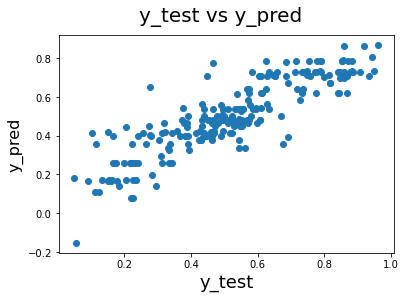

In [135]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. We can look into  the R-squared and more importantly, the adjusted R-squared value for the test set.

In [147]:
# r2_score for 10 variables
from sklearn.metrics import r2_score
round(r2_score(y_test, y_pred),3)

0.752

R squared with test data set in 75.2% while on train dataset is 76.1% which is quite significant and reliable.


## Checking the  predictors are correlated or not

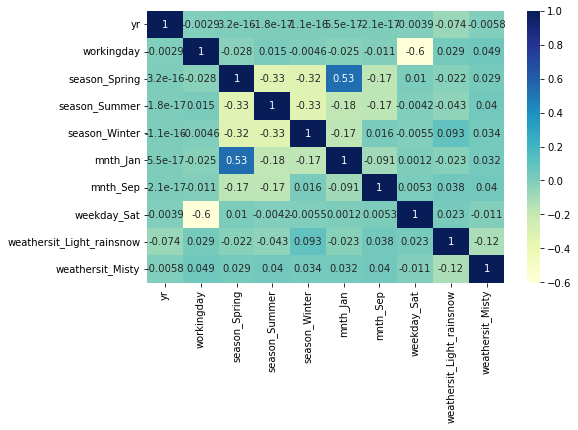

In [137]:
# Figure size
plt.figure(figsize=(8,5))

# Heatmap
sns.heatmap(bike[col2].corr(), cmap="YlGnBu", annot=True)
plt.show()

- The final var are not highly correlated, so we can consider these vars

### The final Equation is:
 Cnt= 0.4821 + 0.247*yr + 0.058*workingday - .2828*Season_Spring - 0.0563*Season_Summer -0.0766 *Season_Winter 
        -0.0888*Mnth_Jan +0.0764Mnth_Sep +0.0621*Weekday_Sat -0.3219*Weathersit_Light_rainsnow - 0.0874*weathersit_Misty
 - one unit change in the predictors, the changes in cnt will be the coefficient times of the precitors. +ve sign is for increase, -ve sign is for decrease
        